Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

Attribute Information:

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2 sex - student's sex (binary: 'F' - female or 'M' - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)

Grades are related with the course subject, Math or Portuguese:

31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets . These students can be identified by searching for identical attributes that characterize each student, as shown in the annexed R file.

Inityally, we won't need to search for duplicate students, as we'll try to predict if the student final grade will be enough to be approved.

But, we'll then try to check if the performance in one subject affects the other one.

For a Final Grade >10 the studen will succeed.


In [ ]:
import pandas as pd
import numpy as snp
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
df = pd.read_csv('student-mat.csv')

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
  #looking for correlation between the features
correlation = df.corr()
correlation

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


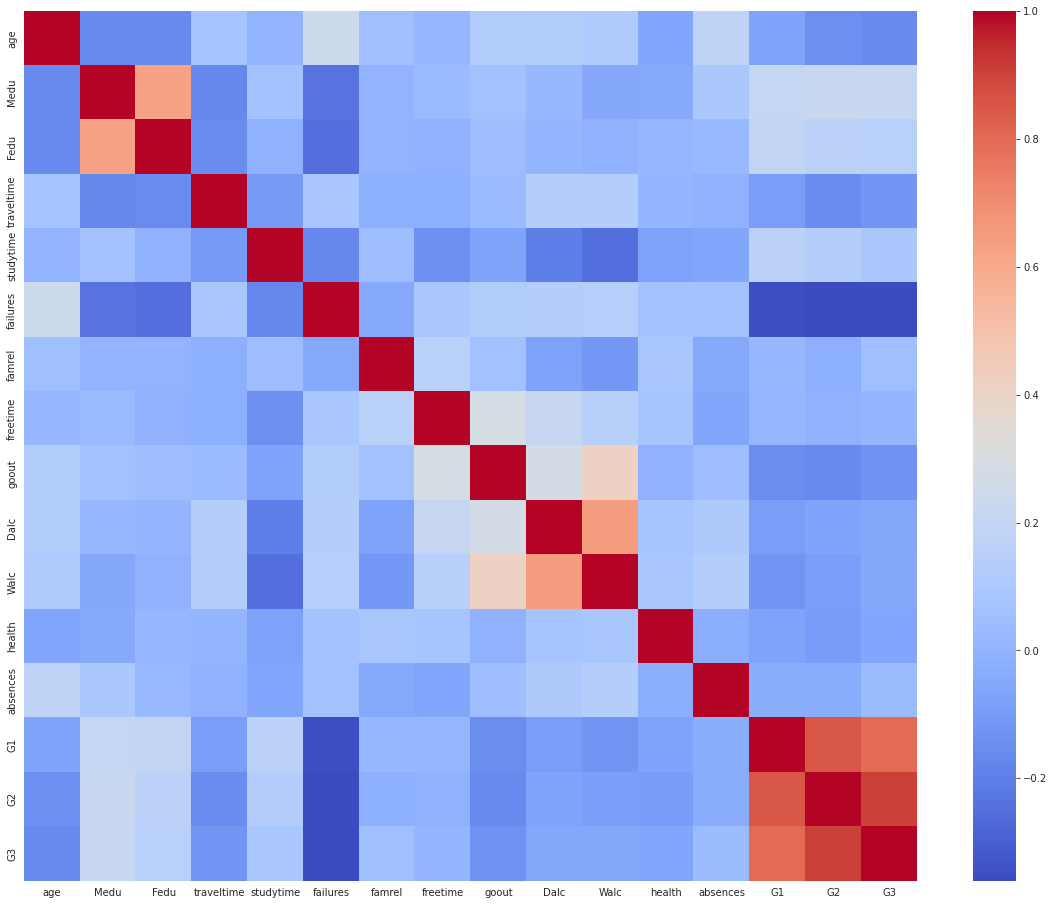

In [ ]:
plt.figure(figsize= (20,16))
sns.heatmap(correlation, cmap= 'coolwarm')


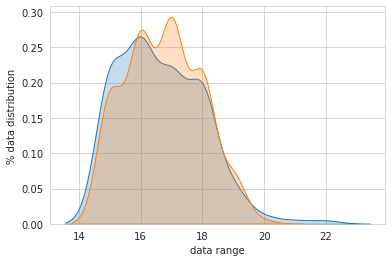

In [ ]:
sns.kdeplot(df.groupby('sex').get_group('M')['age'], shade = True,label = 'male')
sns.kdeplot(df.groupby('sex').get_group('F')['age'], shade = True, label = 'female')
plt.xlabel('data range')
plt.ylabel('% data distribution')
plt.show()
#checking the distribution of the frequency of the age between male and female

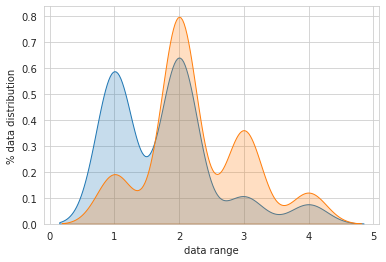

In [ ]:
#checking the distribution of the frequency of the feature studytime between male and female
sns.kdeplot(df.groupby('sex').get_group('M')['studytime'], shade = True,label = 'male')
sns.kdeplot(df.groupby('sex').get_group('F')['studytime'], shade = True, label = 'female')
plt.xlabel('data range')
plt.ylabel('% data distribution')
plt.show()

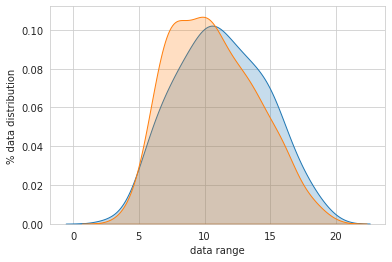

In [ ]:
#checking the distribution of the frequency of the feature G1 between male and female

sns.kdeplot(df.groupby('sex').get_group('M')['G1'], shade = True,label = 'male')
sns.kdeplot(df.groupby('sex').get_group('F')['G1'], shade = True, label = 'female')
plt.xlabel('data range')
plt.ylabel('% data distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

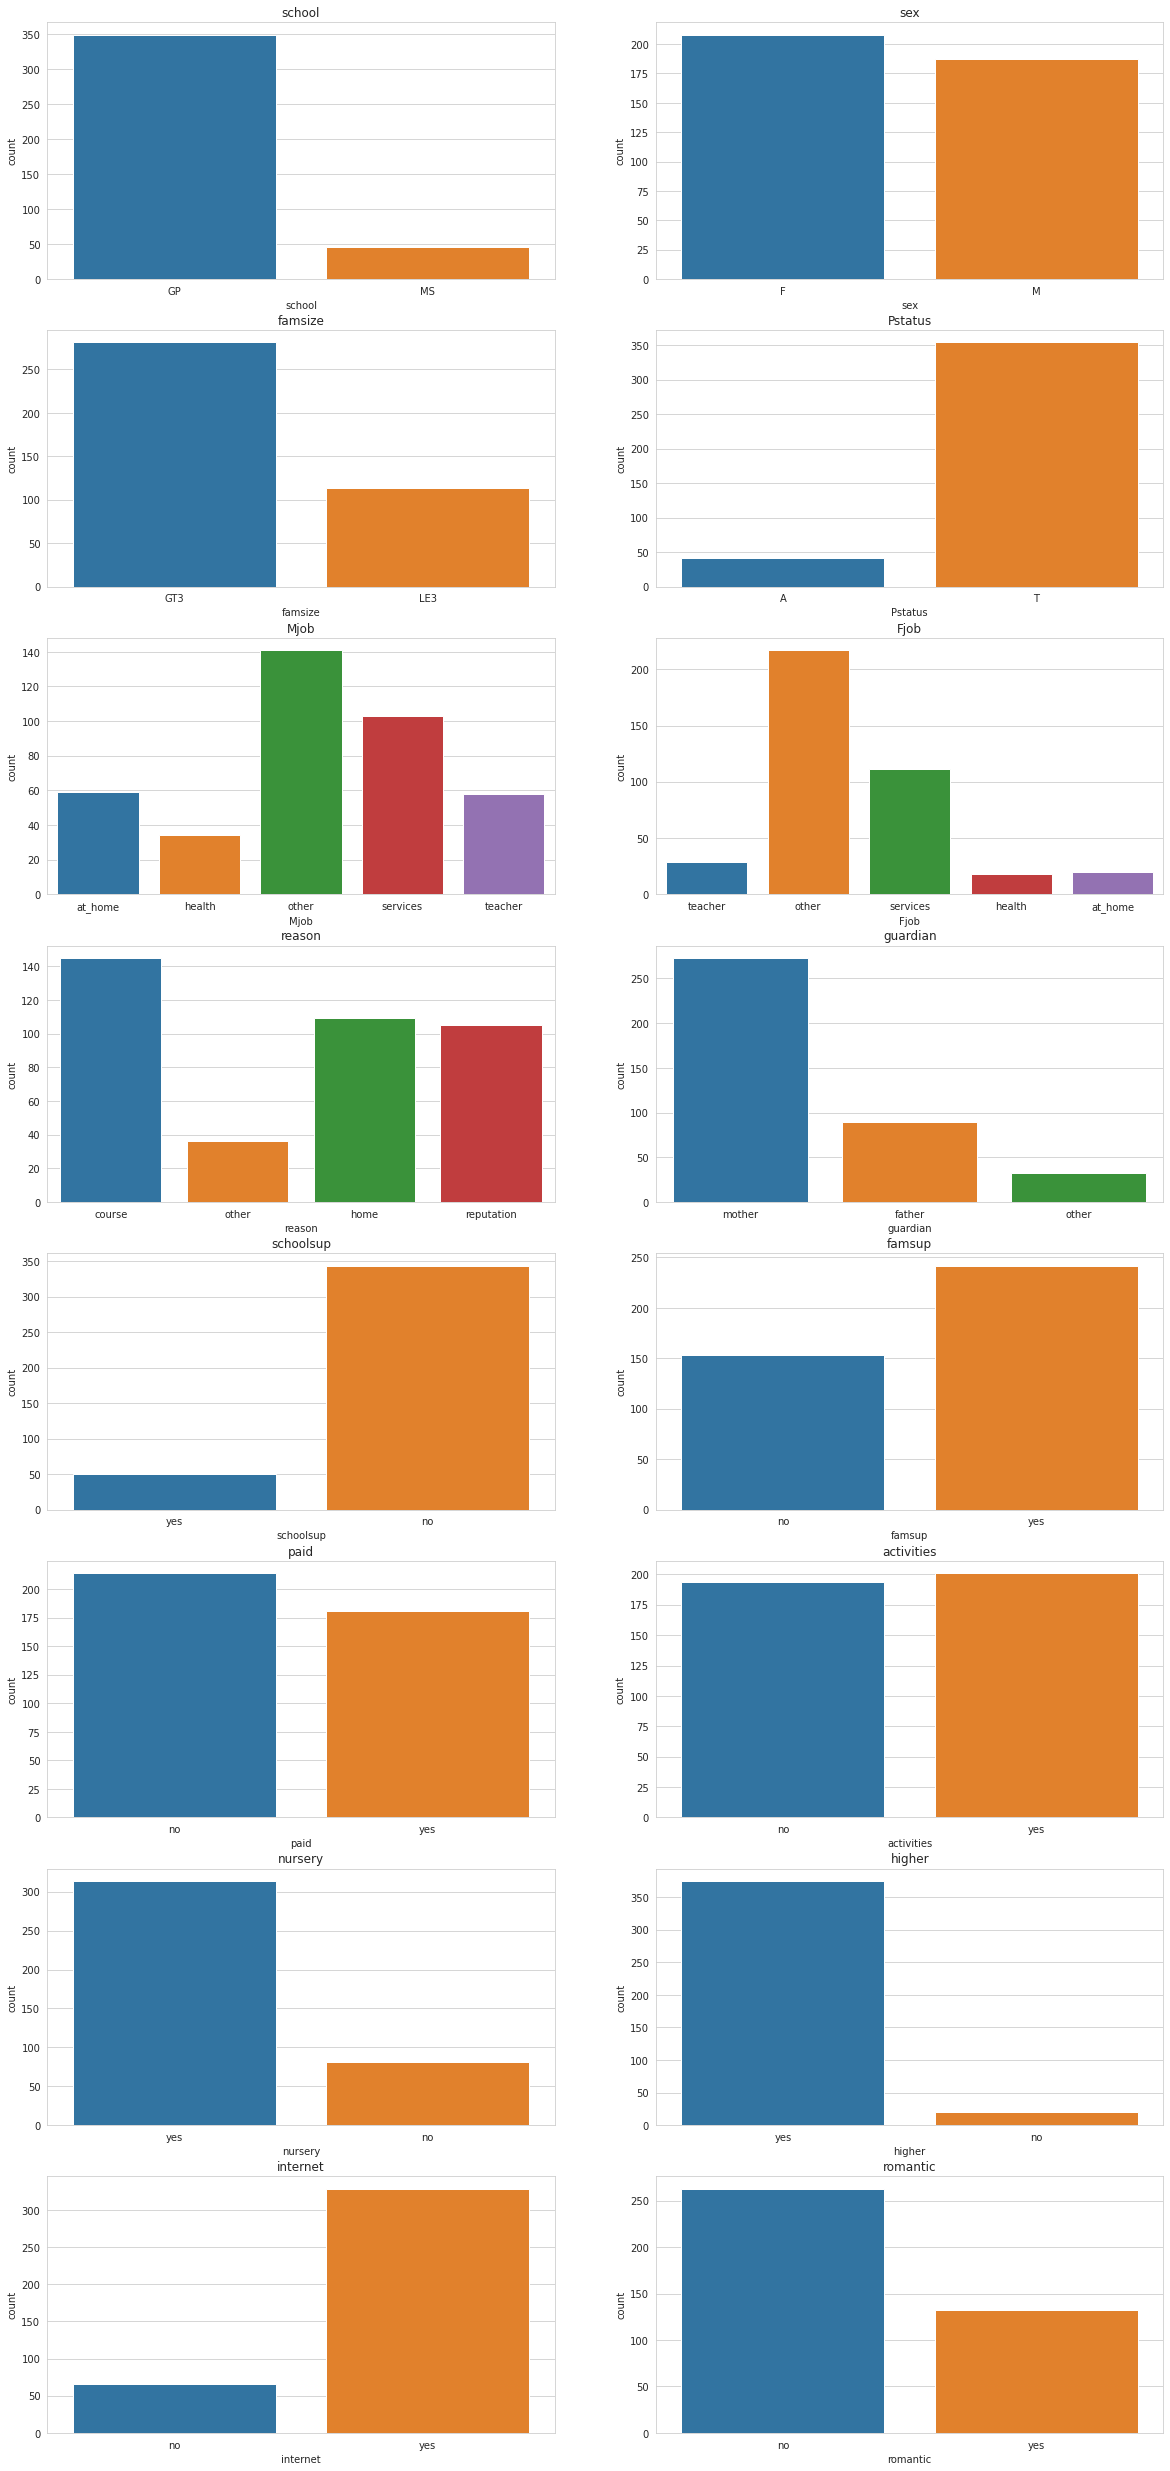

In [ ]:
#couting the values of each feature to know which the value is the most frequent
plt.figure(figsize = (20,50))
for i,item in enumerate(['school', 'sex', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']):
    plt.subplot(9,2,i+1)
    sns.countplot(df[item])
    plt.title(item)

plt.show()   

In [ ]:
#counting the middle value of each categorial value of Fjob in the first period grade
df.groupby('Fjob')['G1'].median()

Fjob
at_home     11.5
health      11.0
other       10.0
services    11.0
teacher     14.0
Name: G1, dtype: float64

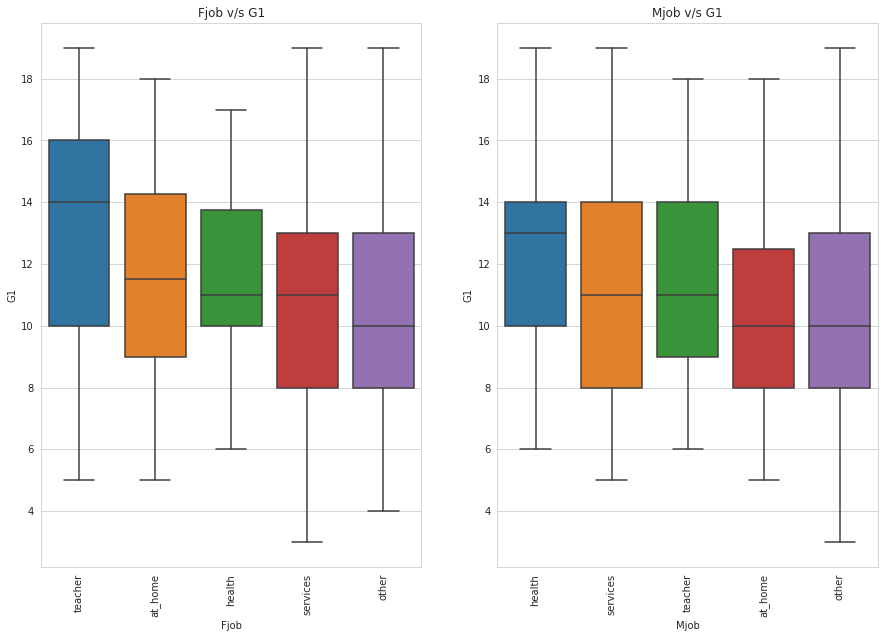

In [ ]:
#comparing the median values of Father job against G1 to Know wich the job's father is the most succesful in first G1
plt.figure(figsize= (15,10))
plt.subplot(1,2,1)
order_by = df.groupby('Fjob')['G1'].median().sort_values(ascending = False).index
sns.boxplot(x = df['Fjob'], y = df['G1'],order = order_by)
plt.xticks(rotation = 90)
plt.title('Fjob v/s G1')
#comparing the median values of Motherjob against G1 to Know wich the job's mother is the most succesful in first G1

plt.subplot(1,2,2)
order_by = df.groupby('Mjob')['G1'].median().sort_values(ascending = False).index
sns.boxplot(x = df['Mjob'], y = df['G1'],order = order_by)
plt.xticks(rotation = 90)
plt.title('Mjob v/s G1')

plt.show()

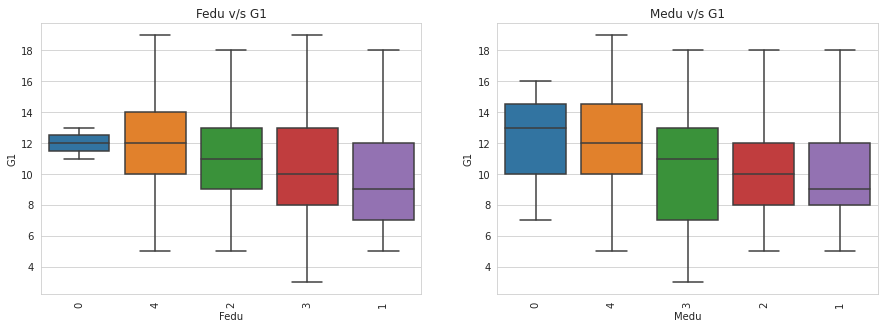

In [ ]:
#comparing the median values of Father educational against G1 to Know wich the level of education of the fathers is the most succesful in first G1
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
order_by = df.groupby('Fedu')['G1'].median().sort_values(ascending = False).index
sns.boxplot(x = df['Fedu'], y = df['G1'],order = order_by)
plt.xticks(rotation = 90)
plt.title('Fedu v/s G1')
plt.subplot(1,2,2)
#comparing the median values of mother educational against G1 to Know wich the level of education of the mothers is the most succesful in first G1

order_by = df.groupby('Medu')['G1'].median().sort_values(ascending = False).index
sns.boxplot(x = df['Medu'], y = df['G1'],order = order_by)
plt.xticks(rotation = 90)
plt.title('Medu v/s G1')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['studytime','failures', 'absences', 'G1', 'G2']]
y = df['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state= 42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(X_train,y_train)
our_pred = lr.predict(X_test)
lr.intercept_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


-1.3499391057720977

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


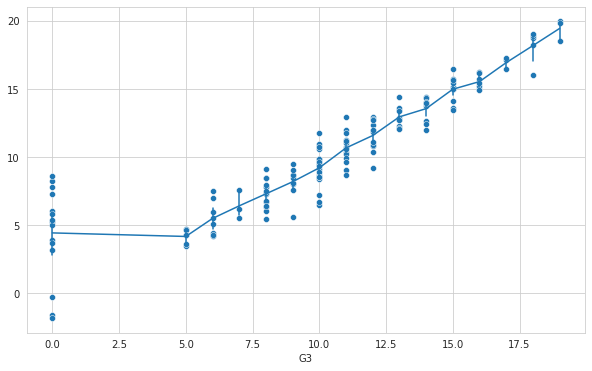

In [ ]:
plt.figure(figsize= (10,6))
sns.lineplot(y_test,our_pred, err_style="bars")
sns.scatterplot(y_test, our_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


MSE 4.01186155181831
R2 Score: 0.8172756829811947


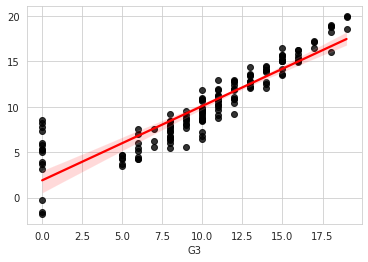

In [ ]:
sns.regplot(y_test,our_pred,scatter_kws={"color": "black"}, line_kws={"color": "red"})
from sklearn import metrics
from sklearn.metrics import r2_score
print('MSE', metrics.mean_squared_error(y_test,our_pred))
print('R2 Score:',r2_score(y_test , our_pred))

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
pred_t = dt.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


MSE 4.370253164556962
R2 Score: 0.8009523722644384


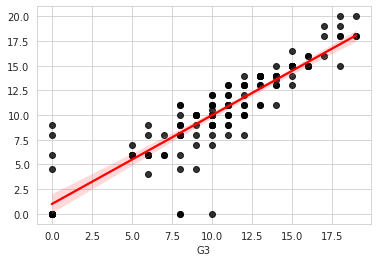

In [ ]:
sns.regplot(y_test,pred_t,scatter_kws={"color": "black"}, line_kws={"color": "red"})
print('MSE', metrics.mean_squared_error(y_test,pred_t))
print('R2 Score:',r2_score(y_test , pred_t))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


MSE 2.505510290102328
R2 Score: 0.8858839841232711


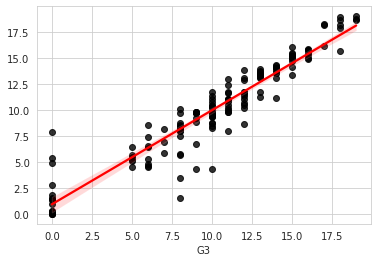

In [ ]:
sns.regplot(y_test,rf_pred,scatter_kws={"color": "black"}, line_kws={"color": "red"})
print('MSE', metrics.mean_squared_error(y_test,rf_pred))
print('R2 Score:',r2_score(y_test , rf_pred))

In [ ]:
#Linear Regression
print('Linear Regression R2 Score:',r2_score(y_test , our_pred))
print("\n")
#Decision Tree
print('Decision Tree R2 Score:',r2_score(y_test , pred_t))
print("\n")
#Random Forest
print('Random Forest R2 Score:',r2_score(y_test , rf_pred))

Linear Regression R2 Score: 0.8172756829811947


Decision Tree R2 Score: 0.8009523722644384


Random Forest R2 Score: 0.8858839841232711
